# SET ROBOFLOW IN .ENV TO DOWNLOAD DATASET

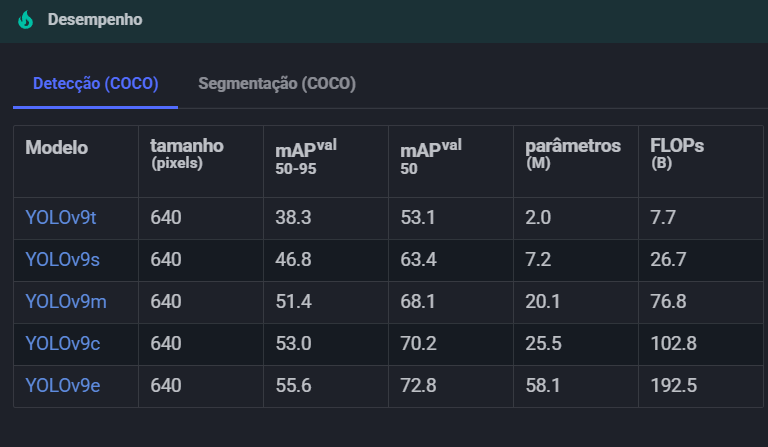

## Environment setup

In [10]:
import os
from dotenv import load_dotenv
load_dotenv()


ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY");

if(not ROBOFLOW_API_KEY):
    raise ValueError("ROBOFLOW_API_KEY not found in environment variables. Please set it in the .env file.")

### Check GPU availability


In [11]:
!nvidia-smi

Mon Oct 20 20:11:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.133.07             Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   45C    P8              2W /  105W |     338MiB /   6141MiB |     13%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [12]:
import os
HOME = os.getcwd()
print(HOME)

/mnt/c/workspace/faculda_10_sem/VisaoComputacionalProjeto/computerVision-forbiddenObjects/jupyter


In [ ]:
# !pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu126


Looking in indexes: https://download.pytorch.org/whl/cu126


In [ ]:
# %pip install torch

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# !pip install -q roboflow supervision ultralytics opencv-python
#!flash-attn no linux para melhoria de performance

### Download example data

example image

In [8]:
!curl -o dog.jpeg https://media.roboflow.com/notebooks/examples/dog.jpeg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  103k  100  103k    0     0  1744k      0 --:--:-- --:--:-- --:--:-- 1755k


## Run inference

run inference with yolov9n

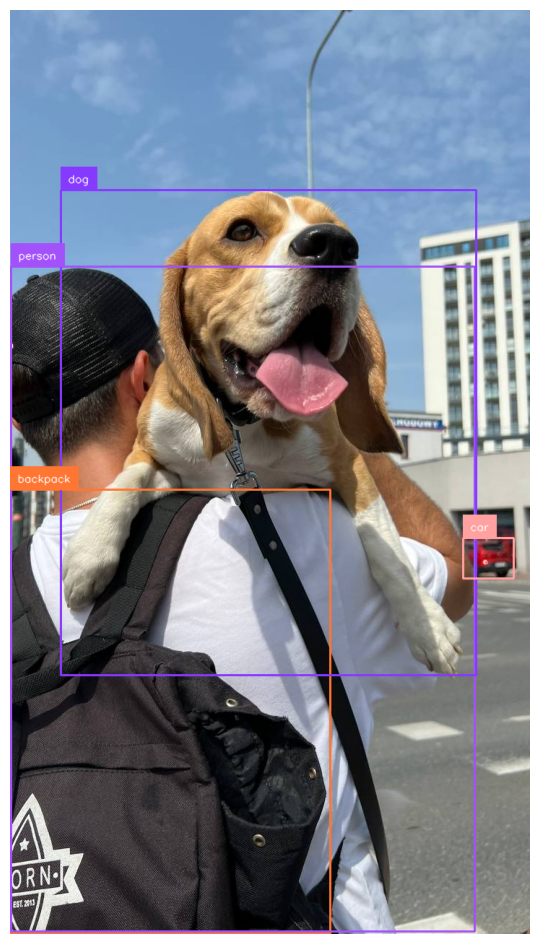

In [13]:
import cv2
from ultralytics import YOLO
import supervision as sv


image_path = f"{HOME}/dog.jpeg"
image = cv2.imread(image_path)

model = YOLO('yolov9m.pt')

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

## Download dataset from Roboflow Universe

In [22]:
from roboflow import download_dataset, Roboflow

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("ethos-ugyxt").project("ac2-visao-bfkss")
version = project.version(1)
dataset = version.download("yolov9")



loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!ls {dataset.location}

'ls' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [14]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

sed: can't read {dataset.location}/data.yaml: No such file or directory


sed: can't read {dataset.location}/data.yaml: No such file or directory
sed: can't read {dataset.location}/data.yaml: No such file or directory
sed: can't read {dataset.location}/data.yaml: No such file or directory
/bin/bash: line 1: {dataset.location}/data.yaml: No such file or directory


In [ ]:
!cat {dataset.location}/data.yaml

'cat' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


## Fine-tune YOLOv9 model


In [15]:
from ultralytics import YOLO

In [ ]:

model = YOLO('yolov9m.pt')

# results = model.train(data=f'{dataset.location}/data.yaml', epochs=100, cfg="arg.yml")

ERROR! Session/line number was not unique in database. History logging moved to new session 391
WARNING 'label_smoothing' is deprecated and will be removed in the future.
Ultralytics 8.3.215  Python-3.12.3 torch-2.9.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=8.5, cache=False, cfg=arg.yml, classes=None, close_mosaic=10, cls=0.7, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=c:\workspace\faculda_10_sem\VisaoComputacionalProjeto\computerVision-forbiddenObjects\jupyter\ac2-visao-1/data.yaml, degrees=15.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.02, hsv_s=0.8, hsv_v=0.5, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width

RuntimeError: Dataset 'c://workspace/faculda_10_sem/VisaoComputacionalProjeto/computerVision-forbiddenObjects/jupyter/ac2-visao-1/data.yaml' error  mapping values are not allowed in this context
  in "<unicode string>", line 14, column 32

In [17]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

## Evaluate fine-tuned

In [18]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

ls: cannot access '/mnt/c/workspace/faculda_10_sem/VisaoComputacionalProjeto/computerVision-forbiddenObjects/jupyter/runs/detect/train/': No such file or directory


In [19]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/workspace/faculda_10_sem/VisaoComputacionalProjeto/computerVision-forbiddenObjects/jupyter/runs/detect/train/confusion_matrix.png'

In [20]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/workspace/faculda_10_sem/VisaoComputacionalProjeto/computerVision-forbiddenObjects/jupyter/runs/detect/train/results.png'

In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

In [ ]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [ ]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

In [ ]:
map.plot()

## Run inference with fine-tuned YOLOv9m model

In [26]:
import supervision as sv

# model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')
model = YOLO(f'/{HOME}/models/100epochs+args.pt')


ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ScannerError: mapping values are not allowed here
  in "/mnt/c/workspace/faculda_10_sem/VisaoComputacionalProjeto/computerVision-forbiddenObjects/jupyter/ac2-visao-1/data.yaml", line 14, column 32

In [ ]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)